In [31]:
!pip install pymongo[srv]

In [32]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout
from pymongo import MongoClient
import json
import time
import pandas as pd
import matplotlib.pyplot as plt

client = MongoClient("mongodb+srv://aryanrada0:<password>@final-project.yvhczbt.mongodb.net/?retryWrites=true&w=majority")
db = client.get_database('crypto')
records = db.crypto

while True:
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '60074b30-5b62-4b4a-8d2e-2e9638817673',
    }

    session = Session()
    session.headers.update(headers)
    response = session.get(url, params=parameters)
    if response.status_code == 200:
        data = response.json()
        records.insert_one(data)
        time.sleep(86400)
else:
    exit()

{'status': {'timestamp': '2023-12-07T16:09:14.575Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8867}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10601, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

NameError: name 'time' is not defined

In [135]:
data = records.find({}, {'data'})
data = pd.json_normalize(data[0]['data'], meta=['id', 'name', 'symbol', 'slug', 'total_supply', ['quote', 'USD', 'price']])
data

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10601,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.956339e+07,1.956339e+07,...,8.543363e+11,53.3238,9.170734e+11,NaN,2023-12-07T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7975,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202229e+08,1.202229e+08,...,2.803469e+11,17.5036,2.803469e+11,NaN,2023-12-07T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,67504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.006808e+10,9.260908e+10,...,9.006878e+10,5.6217,9.260979e+10,NaN,2023-12-07T16:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1816,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516974e+08,1.516974e+08,...,3.532831e+10,2.2050,3.532831e+10,NaN,2023-12-07T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1166,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.388857e+10,9.998819e+10,...,3.435051e+10,2.1440,6.374359e+10,NaN,2023-12-07T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5632,Arweave,AR,arweave,102,2020-05-27T00:00:00.000Z,"[distributed-computing, filesharing, storage, ...",6.600000e+07,6.545418e+07,6.545418e+07,...,5.341849e+08,0.0333,5.386394e+08,NaN,2023-12-07T16:07:00.000Z,NaN,NaN,NaN,NaN,NaN
96,1437,Zcash,ZEC,zcash,325,2016-10-29T00:00:00.000Z,"[mineable, pow, equihash, medium-of-exchange, ...",2.100000e+07,1.632827e+07,1.632827e+07,...,5.244500e+08,0.0327,6.745021e+08,NaN,2023-12-07T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN
97,1785,Gas,GAS,gas,97,2017-07-06T00:00:00.000Z,"[medium-of-exchange, payments, smart-contracts]",NaN,6.530220e+07,6.530220e+07,...,5.033104e+08,0.0314,5.033104e+08,NaN,2023-12-07T16:07:00.000Z,1376.0,Neo,NEO,neo,0xd2a4cff31913016155e38e474a2c06d08be276cf
98,5176,Tether Gold,XAUt,tether-gold,60,2020-02-07T00:00:00.000Z,[tokenized-gold],NaN,2.465240e+05,2.465240e+05,...,5.017068e+08,0.0313,5.017068e+08,NaN,2023-12-07T16:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0x68749665FF8D2d112Fa859AA293F07A622782F38


In [136]:
data = data.drop(columns=['platform.token_address', 'platform.slug', 'platform.symbol', 'platform.name', 'platform.id', 'id', 'num_market_pairs', 'date_added', 'tags', 'quote.USD.tvl', 'quote.USD.last_updated', 'quote.USD.market_cap_dominance', 'quote.USD.percent_change_90d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_1h', 'quote.USD.volume_change_24h', 'last_updated', 'tvl_ratio', 'self_reported_market_cap', 'self_reported_circulating_supply', 'cmc_rank', 'platform', 'max_supply', 'circulating_supply', 'quote.USD.market_cap', 'quote.USD.fully_diluted_market_cap', 'slug'])
data

,name,symbol,total_supply,infinite_supply,quote.USD.price,quote.USD.volume_24h,quote.USD.percent_change_24h
0,Bitcoin,BTC,1.956339e+07,False,43670.161531,2.646125e+10,-0.200414
1,Ethereum,ETH,1.202229e+08,True,2331.892238,1.240721e+10,3.550044
2,Tether USDt,USDT,9.260908e+10,True,1.000008,4.888049e+10,-0.025285
3,BNB,BNB,1.516974e+08,False,232.886660,7.975447e+08,1.015672
4,XRP,XRP,9.998819e+10,False,0.637436,1.941434e+09,1.458032
...,...,...,...,...,...,...,...
95,Arweave,AR,6.545418e+07,False,8.161204,1.346495e+07,2.157565
96,Zcash,ZEC,1.632827e+07,False,32.119145,7.925403e+07,1.858986
97,Gas,GAS,6.530220e+07,False,7.707404,3.729034e+07,1.167251
98,Tether Gold,XAUt,2.465240e+05,False,2035.123644,3.705675e+06,0.017542


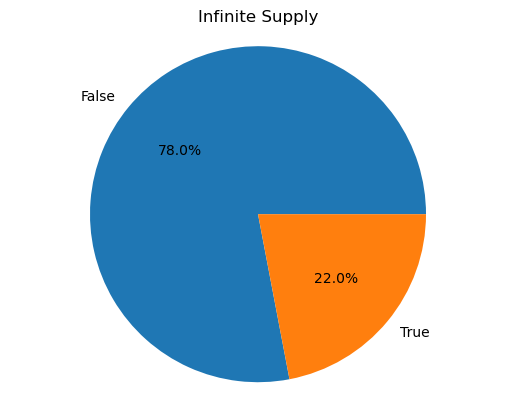

In [137]:
pie = data.groupby('infinite_supply').count()
fig, ax = plt.subplots()
ax.pie(pie['name'], labels=pie.index, autopct='%1.1f%%')
ax.axis('equal') 
ax.set_title('Infinite Supply')
plt.show()

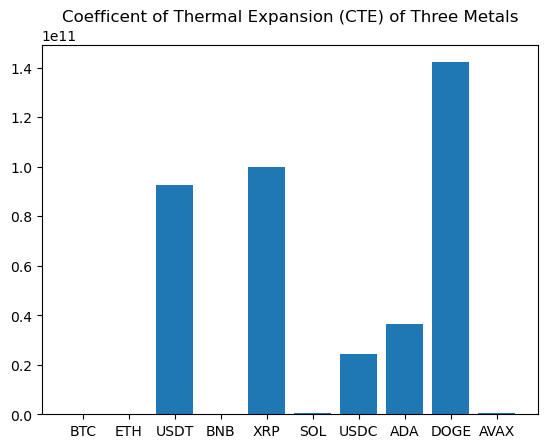

In [138]:
top10 = data.head(10)
fig, ax = plt.subplots()

ax.bar(top10['symbol'], top10['total_supply'], align='center')
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
plt.show()

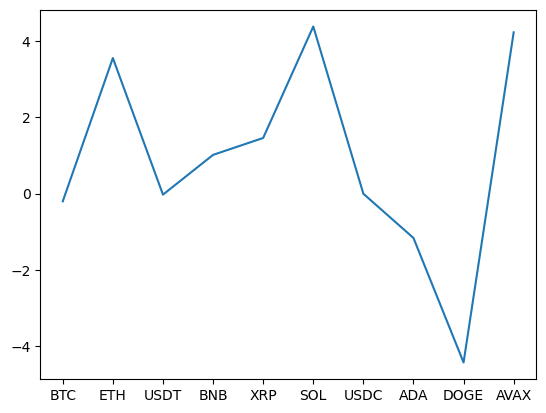

In [139]:
plt.plot(top10['symbol'], top10['quote.USD.percent_change_24h'])
plt.show()